### Changes status randomly at pipes during simulation.

This example contains:
* Load a network.
* Get pipe count.
* Get pipe indices.
* Run step by step hydraulic analysis.
* Set status random 0/1 for pipes.
* Plot flows.
* Unload library.


In [1]:
import random
from epyt import epanet

# Load network
d = epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 1.0.5).
Input File Net1.inp loaded successfully.



In [2]:
# Get pipe count.
pipe_count = d.getLinkPipeCount()
# Get pipe indices.
pipe_indices = d.getLinkPipeIndex()

# Run step by step hydraulic analysis.
d.openHydraulicAnalysis()
d.initializeHydraulicAnalysis()
tstep = 1
F = []
while tstep > 0:
    # Set status random 0/1 for pipes.
    Status = [random.randint(0, 1) for i in range(pipe_count)]
    t = d.runHydraulicAnalysis()
    d.setLinkStatus(pipe_indices, Status)
    F.append(d.getLinkFlows())
    tstep = d.nextHydraulicAnalysisStep()
d.closeHydraulicAnalysis()

C:\Users\mkiri\OneDrive - University of Cyprus\GITHUB\EPyT\epyt\epanet.py:11809: UserWarning: WARNING: System has negative pressures.
  warnings.warn(errmssg.value.decode())


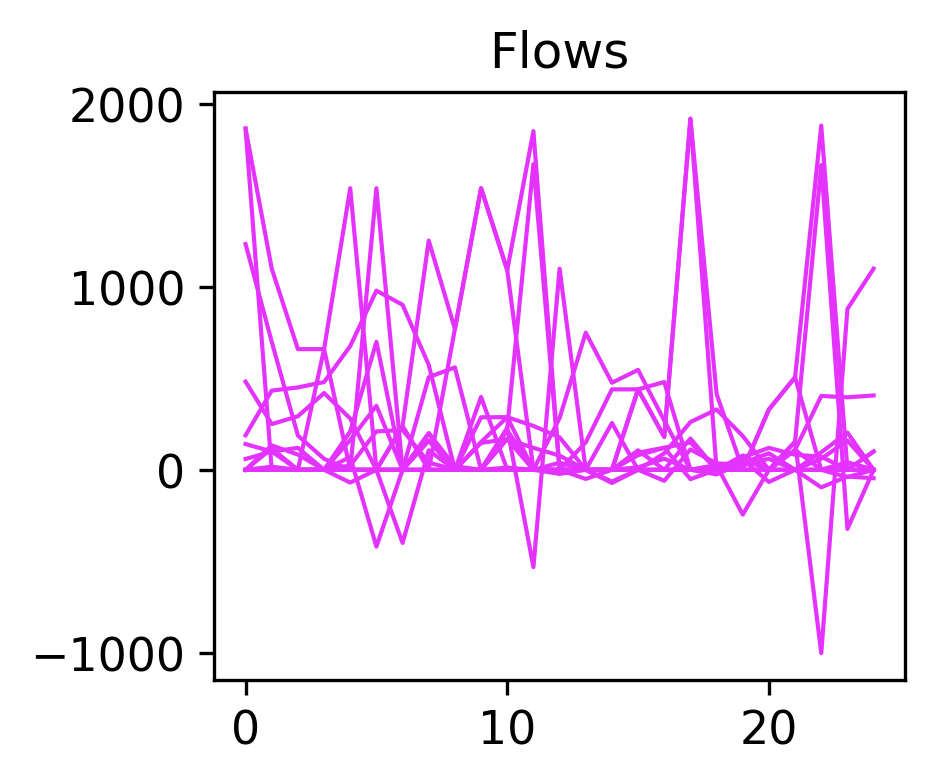

In [3]:
# Plot flows.
d.plot_ts(Y=F, marker=None, color=None, title='Flows')

In [4]:
# Unload library.
d.unload()

Close toolkit for the input file "Net1". EPANET Toolkit is unloaded.

